In [3]:
import pandas as pd
import numpy as np

In [4]:
import warnings 
warnings.filterwarnings('ignore')

### 1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

In [183]:
data = pd.read_csv('glass.csv')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### 2. Проведите первичный анализ.
Проверьте количество записей для каждого класса. Сделайте вывод.

In [6]:
ind = 0
_list = []
for i in range(1,8):
    count = len(data[data['Type']==i])
    ind += 1
    print(f'{ind}: {count}')

1: 70
2: 76
3: 17
4: 0
5: 13
6: 9
7: 29


    Вывод: 
    Совсем нет стекла 4 типа. По сути, тут не 7 классов, а 6. 
    Больше всего стекла 2 типа, меньше всего стекла 6 типа.

### 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [7]:
x = data[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y = data[['Type']]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

### 4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators=50, random_state=10) #n_estomators - кол-во моделей
#использует ансамдль деревьев
clf_forest.fit(x, y)

RandomForestClassifier(n_estimators=50, random_state=10)

### 5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

In [10]:
predictions_forest = clf_forest.predict(X_test)

In [11]:
from sklearn.metrics import classification_report
print(f'Для случайного леса: \n\n{classification_report(y_test, predictions_forest)}')

Для случайного леса: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         4

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



### 6. Обработайте выбросы в данных.
#### а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?

array([[<Axes: title={'center': 'RI'}>]], dtype=object)

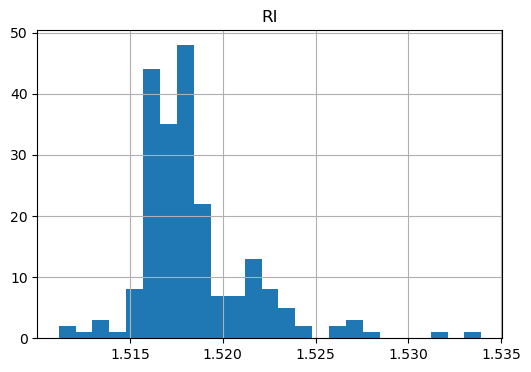

In [12]:
data[['RI']].hist(bins=25, figsize=(6,4))

array([[<Axes: title={'center': 'Na'}>]], dtype=object)

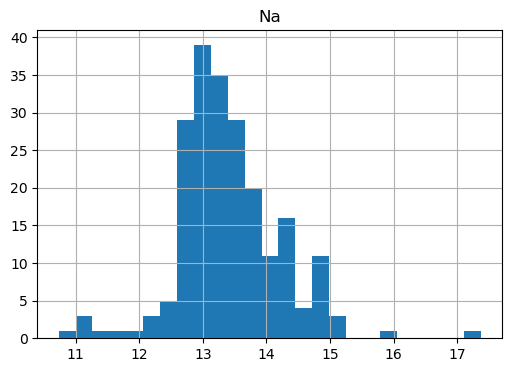

In [13]:
data[['Na']].hist(bins=25, figsize=(6,4))

array([[<Axes: title={'center': 'Mg'}>]], dtype=object)

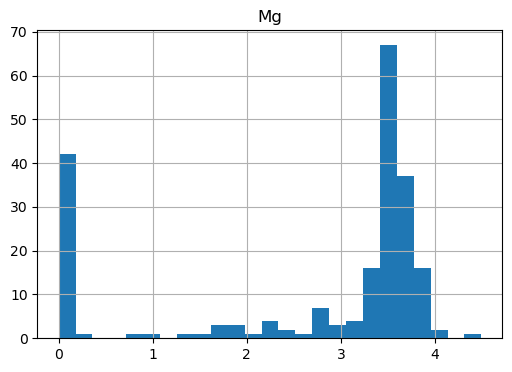

In [14]:
data[['Mg']].hist(bins=25, figsize=(6,4))

array([[<Axes: title={'center': 'Al'}>]], dtype=object)

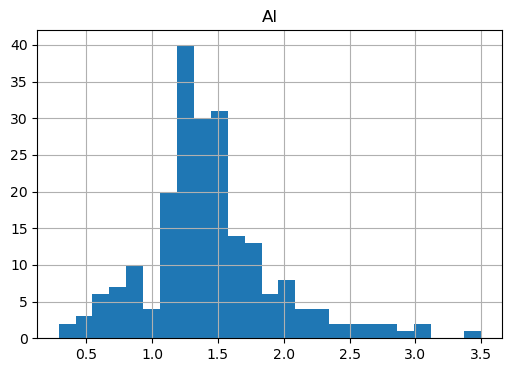

In [15]:
data[['Al']].hist(bins=25, figsize=(6,4))

array([[<Axes: title={'center': 'Si'}>]], dtype=object)

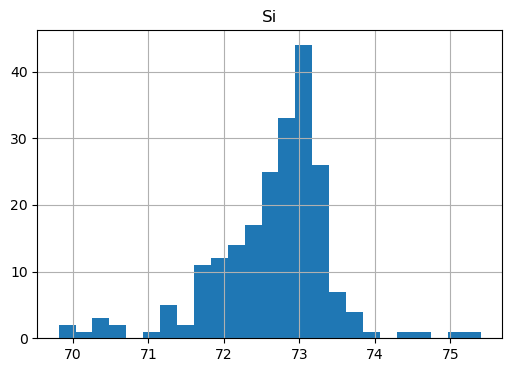

In [16]:
data[['Si']].hist(bins=25, figsize=(6,4))

array([[<Axes: title={'center': 'K'}>]], dtype=object)

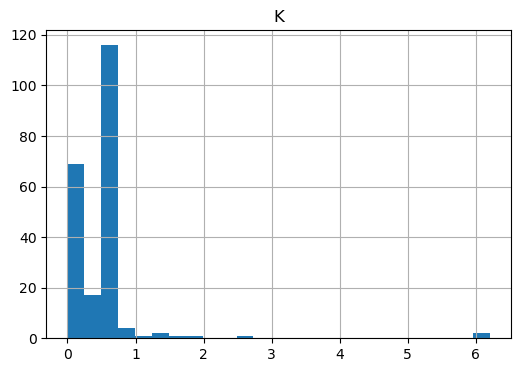

In [17]:
data[['K']].hist(bins=25, figsize=(6,4))

array([[<Axes: title={'center': 'Ca'}>]], dtype=object)

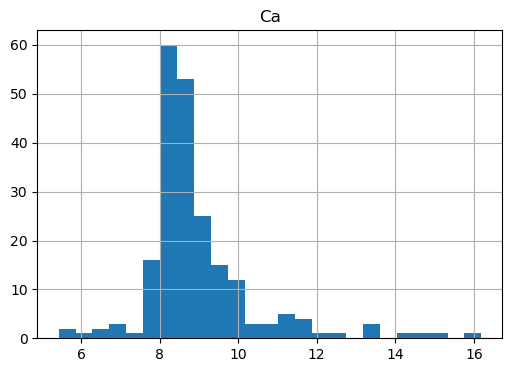

In [18]:
data[['Ca']].hist(bins=25, figsize=(6,4))

array([[<Axes: title={'center': 'Ba'}>]], dtype=object)

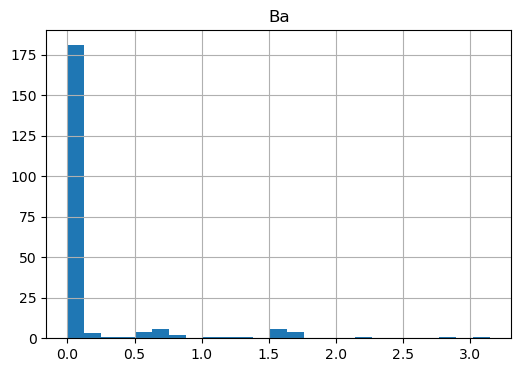

In [19]:
data[['Ba']].hist(bins=25, figsize=(6,4))

array([[<Axes: title={'center': 'Fe'}>]], dtype=object)

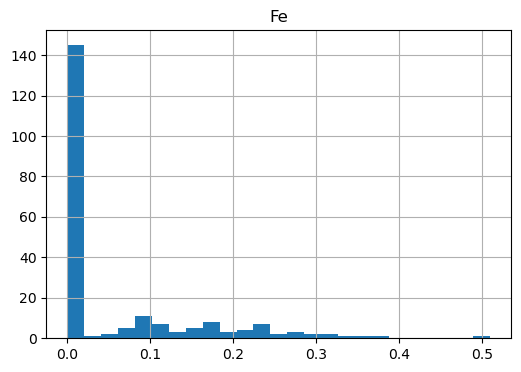

In [20]:
data[['Fe']].hist(bins=25, figsize=(6,4))

    Вывод: 
    с нормальным распределением: RI, Na, Ai, Si, Ca
    скорее всего, будет с нормальным после удаления выбросов: Fe
    не с нормальным распределением: Mg, K, Ba

#### b) Исследуйте признаки на выбросы несколькими способами.

In [21]:
import matplotlib.pyplot as plt

###### b.1) Статистические тесты

In [22]:
lower_bound = data.RI.quantile(q=0.025)
upper_bound = data.RI.quantile(q=0.975)
data[(data.RI < lower_bound) | (data.RI > upper_bound)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
47,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.00,0.10,1
56,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1
103,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.00,0.00,2
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
112,1.52777,12.64,0.00,0.67,72.02,0.06,14.40,0.00,0.00,2
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5
180,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.00,0.00,6


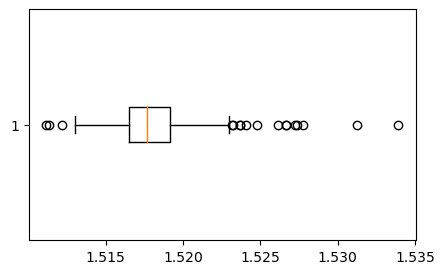

In [23]:
fig, ax = plt.subplots(figsize=(5,3))
ax.boxplot(data['RI'], vert=False)
plt.show()

In [24]:
lower_bound = data.Na.quantile(q=0.025)
upper_bound = data.Na.quantile(q=0.975)
data[(data.Na < lower_bound) | (data.Na > upper_bound)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
165,1.52171,11.56,1.88,1.56,72.86,0.47,11.41,0.00,0.00,5
166,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.00,0.00,5
181,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.00,0.00,6
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6
189,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7
199,1.51609,15.01,0.00,2.51,73.05,0.05,8.83,0.53,0.00,7


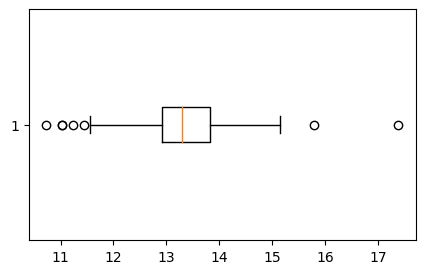

In [25]:
fig, ax = plt.subplots(figsize=(5,3))
ax.boxplot(data['Na'], vert=False)
plt.show()

In [26]:
lower_bound = data.Al.quantile(q=0.025)
upper_bound = data.Al.quantile(q=0.975)
data[(data.Al < lower_bound) | (data.Al > upper_bound)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7


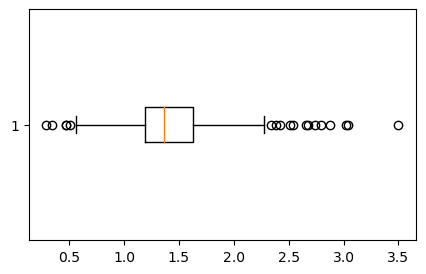

In [27]:
fig, ax = plt.subplots(figsize=(5,3))
ax.boxplot(data['Al'], vert=False)
plt.show()

In [28]:
lower_bound = data.Si.quantile(q=0.025)
upper_bound = data.Si.quantile(q=0.975)
data[(data.Si < lower_bound) | (data.Si > upper_bound)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
102,1.51820,12.62,2.76,0.83,73.81,0.35,9.42,0.00,0.20,2
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.00,2
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5
168,1.51666,12.86,0.00,1.83,73.88,0.97,10.17,0.00,0.00,5
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5
180,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.00,0.00,6
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6
188,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00,7


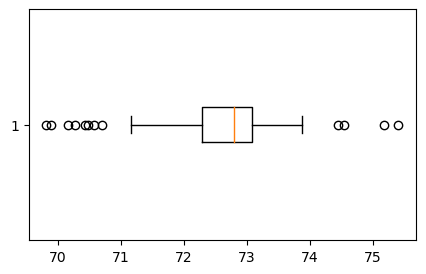

In [29]:
fig, ax = plt.subplots(figsize=(5,3))
ax.boxplot(data['Si'], vert=False)
plt.show()

In [30]:
lower_bound = data.Ca.quantile(q=0.025)
upper_bound = data.Ca.quantile(q=0.975)
data[(data.Ca < lower_bound) | (data.Ca > upper_bound)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
112,1.52777,12.64,0.00,0.67,72.02,0.06,14.40,0.00,0.00,2
131,1.52614,13.70,0.00,1.36,71.24,0.19,13.44,0.00,0.10,2
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6
185,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7


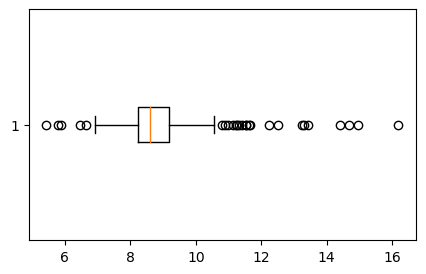

In [31]:
fig, ax = plt.subplots(figsize=(5,3))
ax.boxplot(data['Ca'], vert=False)
plt.show()

In [32]:
lower_bound = data.Mg.quantile(q=0.025)
upper_bound = data.Mg.quantile(q=0.975)
data[(data.Mg < lower_bound) | (data.Mg > upper_bound)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
114,1.51847,13.10,3.97,1.19,72.44,0.60,8.43,0.0,0.00,2
132,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.0,0.00,2
133,1.51800,13.71,3.93,1.54,71.81,0.54,8.21,0.0,0.15,2


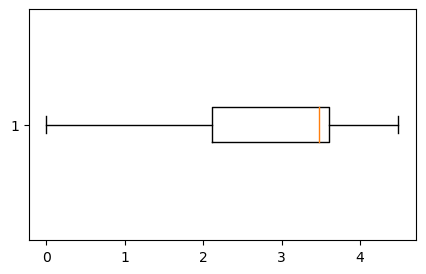

In [33]:
fig, ax = plt.subplots(figsize=(5,3))
ax.boxplot(data['Mg'], vert=False)
plt.show()

In [34]:
lower_bound = data.Fe.quantile(q=0.025)
upper_bound = data.Fe.quantile(q=0.975)
data[(data.Fe < lower_bound) | (data.Fe > upper_bound)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
56,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1
71,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,2
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
145,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
162,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
174,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51,5


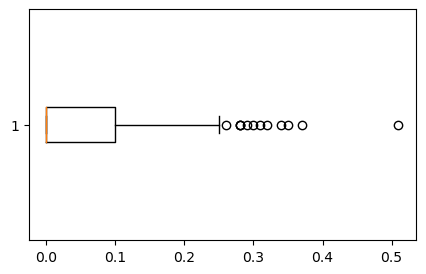

In [35]:
fig, ax = plt.subplots(figsize=(5,3))
ax.boxplot(data['Fe'], vert=False)
plt.show()

In [ ]:
#непонятно, реальное ли значение 0, или это отсутствие данных.

###### b.2) Метод опорных векторов

In [36]:
# подгружаем необходимые библиотеки
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.datasets import load_wine
from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

In [44]:
import numpy as np
import seaborn as sns
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import matplotlib.font_manager 
%matplotlib inline

In [ ]:
x = data[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]

In [53]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [133]:
X1 = data[['RI', 'Na']]

In [114]:
import matplotlib.lines as mlines

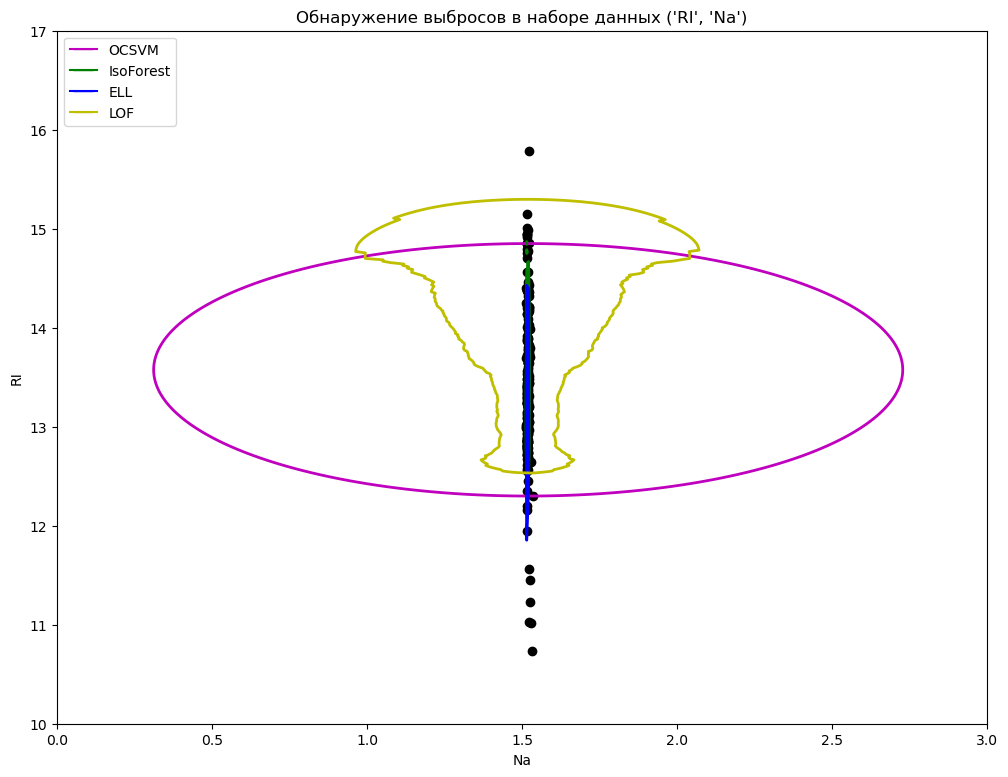

In [134]:
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause
classifiers = {
    "OCSVM": OneClassSVM(nu=0.1), # nu - % выбросов
    "IsoForest": IsolationForest(),
    "ELL": EllipticEnvelope(contamination=0.2),
    "LOF": LocalOutlierFactor(novelty=True)
}
colors = ['m', 'g', 'b', 'y']
legend1 = {}
legend2 = {}


# Выделяем границы обнаружения выбросов с помощью нескольких классификаторов
# метод meshgrid используется для красивой отрисовки
xx1, yy1 = np.meshgrid(np.linspace(0, 3, 500), np.linspace(10, 17, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1, figsize=(12,9))
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Отрисовка результатов (= форма облака точек данных)
plt.figure(1, figsize=(12,9))  # 2 кластера
plt.title("Обнаружение выбросов в наборе данных ('RI', 'Na')")
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], color='black')

plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))

purp_line = mlines.Line2D([], [], color='m', marker='_',
                          markersize=15, label='OCSVM')
green_line = mlines.Line2D([], [], color='g', marker='_',
                          markersize=15, label='IsoForest')
blue_line = mlines.Line2D([], [], color='b', marker='_',
                          markersize=15, label='ELL')
yellow_line = mlines.Line2D([], [], color='y', marker='_',
                          markersize=15, label='LOF')

plt.legend(loc="upper left", handles = [purp_line, green_line, blue_line, yellow_line])

plt.ylabel("RI")
plt.xlabel("Na")
plt.show()

In [135]:
X1 = data[['Mg', 'Al']]

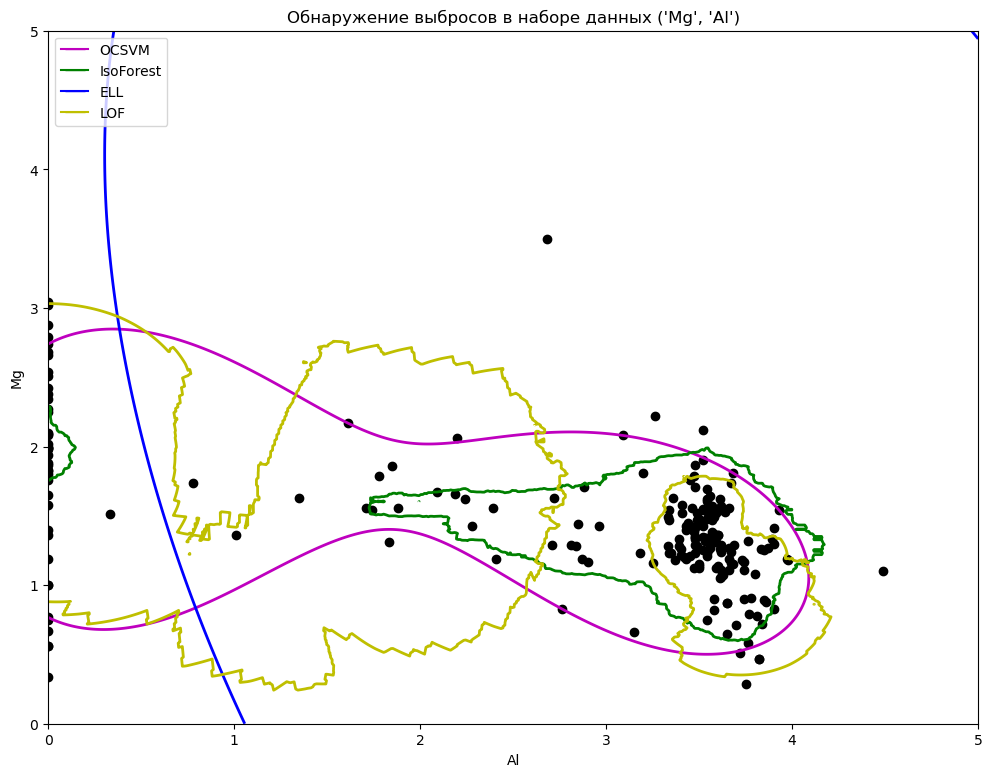

In [136]:
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause
classifiers = {
    "OCSVM": OneClassSVM(nu=0.1), # nu - % выбросов
    "IsoForest": IsolationForest(),
    "ELL": EllipticEnvelope(contamination=0.2),
    "LOF": LocalOutlierFactor(novelty=True)
}
colors = ['m', 'g', 'b', 'y']
legend1 = {}
legend2 = {}


# Выделяем границы обнаружения выбросов с помощью нескольких классификаторов
# метод meshgrid используется для красивой отрисовки
xx1, yy1 = np.meshgrid(np.linspace(0, 5, 500), np.linspace(0, 5, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1, figsize=(12,9))
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Отрисовка результатов (= форма облака точек данных)
plt.figure(1, figsize=(12,9))  # 2 кластера
plt.title("Обнаружение выбросов в наборе данных ('Mg', 'Al')")
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], color='black')

plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))

purp_line = mlines.Line2D([], [], color='m', marker='_',
                          markersize=15, label='OCSVM')
green_line = mlines.Line2D([], [], color='g', marker='_',
                          markersize=15, label='IsoForest')
blue_line = mlines.Line2D([], [], color='b', marker='_',
                          markersize=15, label='ELL')
yellow_line = mlines.Line2D([], [], color='y', marker='_',
                          markersize=15, label='LOF')

plt.legend(loc="upper left", handles = [purp_line, green_line, blue_line, yellow_line])

plt.ylabel("Mg")
plt.xlabel("Al")
plt.show()

In [137]:
X1 = data[['Si', 'K']]

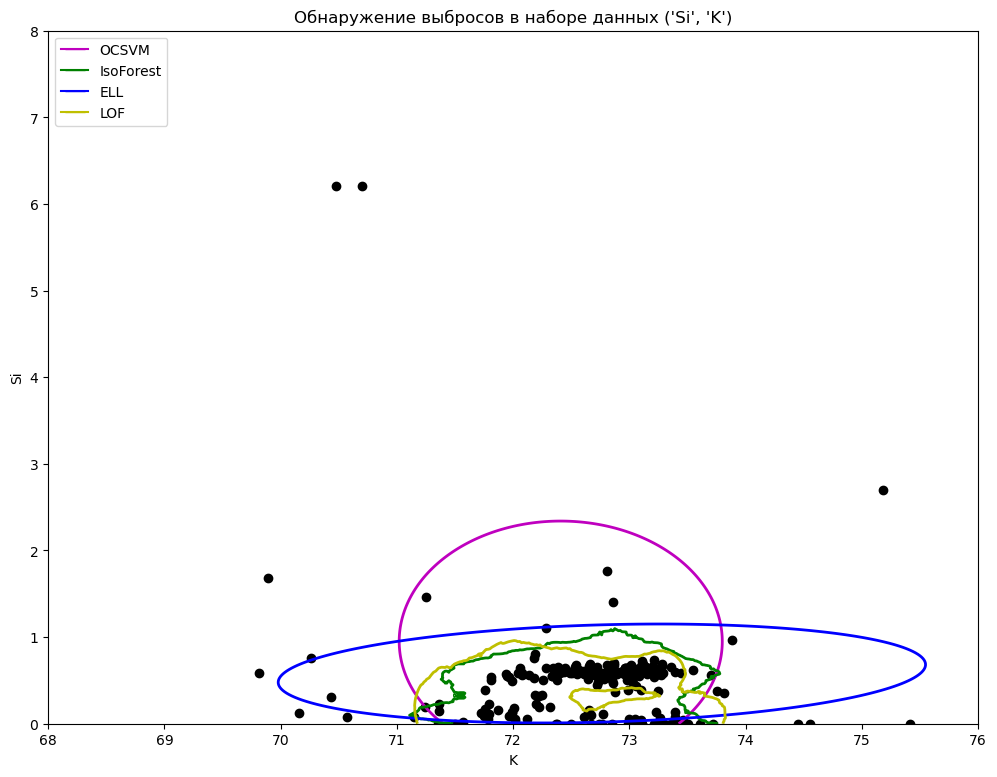

In [139]:
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause
classifiers = {
    "OCSVM": OneClassSVM(nu=0.1), # nu - % выбросов
    "IsoForest": IsolationForest(),
    "ELL": EllipticEnvelope(contamination=0.2),
    "LOF": LocalOutlierFactor(novelty=True)
}
colors = ['m', 'g', 'b', 'y']
legend1 = {}
legend2 = {}


# Выделяем границы обнаружения выбросов с помощью нескольких классификаторов
# метод meshgrid используется для красивой отрисовки
xx1, yy1 = np.meshgrid(np.linspace(68, 76, 500), np.linspace(0, 8, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1, figsize=(12,9))
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Отрисовка результатов (= форма облака точек данных)
plt.figure(1, figsize=(12,9))  # 2 кластера
plt.title("Обнаружение выбросов в наборе данных ('Si', 'K')")
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], color='black')

plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))

purp_line = mlines.Line2D([], [], color='m', marker='_',
                          markersize=15, label='OCSVM')
green_line = mlines.Line2D([], [], color='g', marker='_',
                          markersize=15, label='IsoForest')
blue_line = mlines.Line2D([], [], color='b', marker='_',
                          markersize=15, label='ELL')
yellow_line = mlines.Line2D([], [], color='y', marker='_',
                          markersize=15, label='LOF')

plt.legend(loc="upper left", handles = [purp_line, green_line, blue_line, yellow_line])

plt.ylabel("Si")
plt.xlabel("K")
plt.show()

In [140]:
X1 = data[['Ca', 'Ba']]

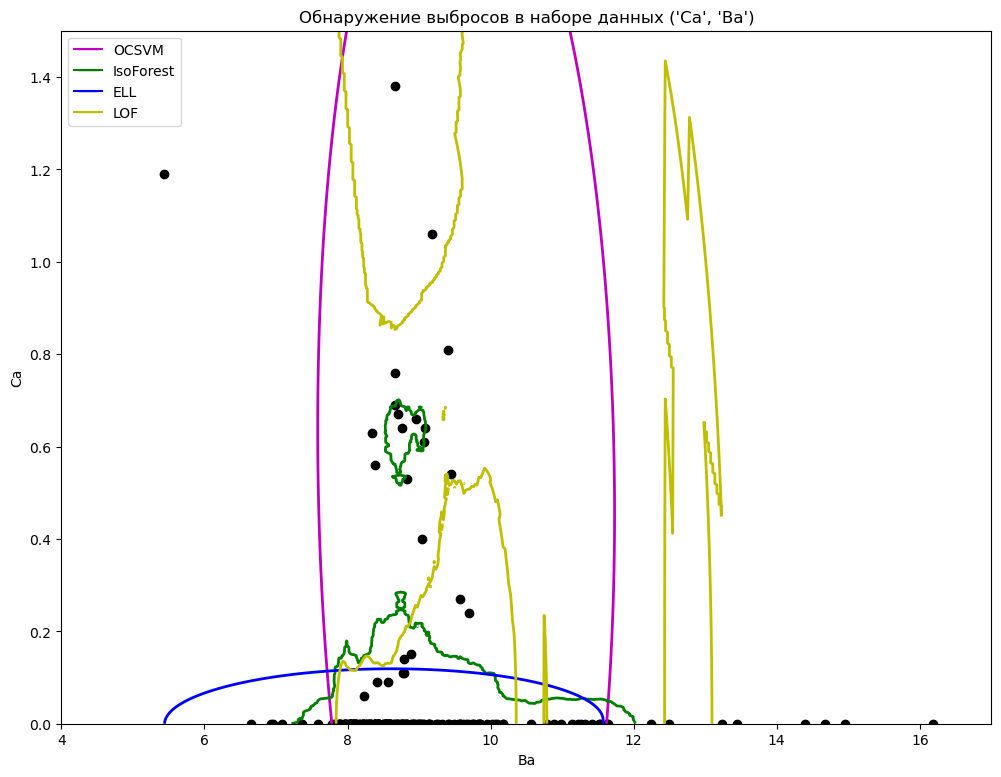

In [141]:
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause
classifiers = {
    "OCSVM": OneClassSVM(nu=0.1), # nu - % выбросов
    "IsoForest": IsolationForest(),
    "ELL": EllipticEnvelope(contamination=0.2),
    "LOF": LocalOutlierFactor(novelty=True)
}
colors = ['m', 'g', 'b', 'y']
legend1 = {}
legend2 = {}


# Выделяем границы обнаружения выбросов с помощью нескольких классификаторов
# метод meshgrid используется для красивой отрисовки
xx1, yy1 = np.meshgrid(np.linspace(4, 17, 500), np.linspace(0, 1.5, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1, figsize=(12,9))
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Отрисовка результатов (= форма облака точек данных)
plt.figure(1, figsize=(12,9))  # 2 кластера
plt.title("Обнаружение выбросов в наборе данных ('Ca', 'Ba')")
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], color='black')

plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))

purp_line = mlines.Line2D([], [], color='m', marker='_',
                          markersize=15, label='OCSVM')
green_line = mlines.Line2D([], [], color='g', marker='_',
                          markersize=15, label='IsoForest')
blue_line = mlines.Line2D([], [], color='b', marker='_',
                          markersize=15, label='ELL')
yellow_line = mlines.Line2D([], [], color='y', marker='_',
                          markersize=15, label='LOF')

plt.legend(loc="upper left", handles = [purp_line, green_line, blue_line, yellow_line])

plt.ylabel("Ca")
plt.xlabel("Ba")
plt.show()

In [142]:
X1 = data[['Ba', 'Fe']]

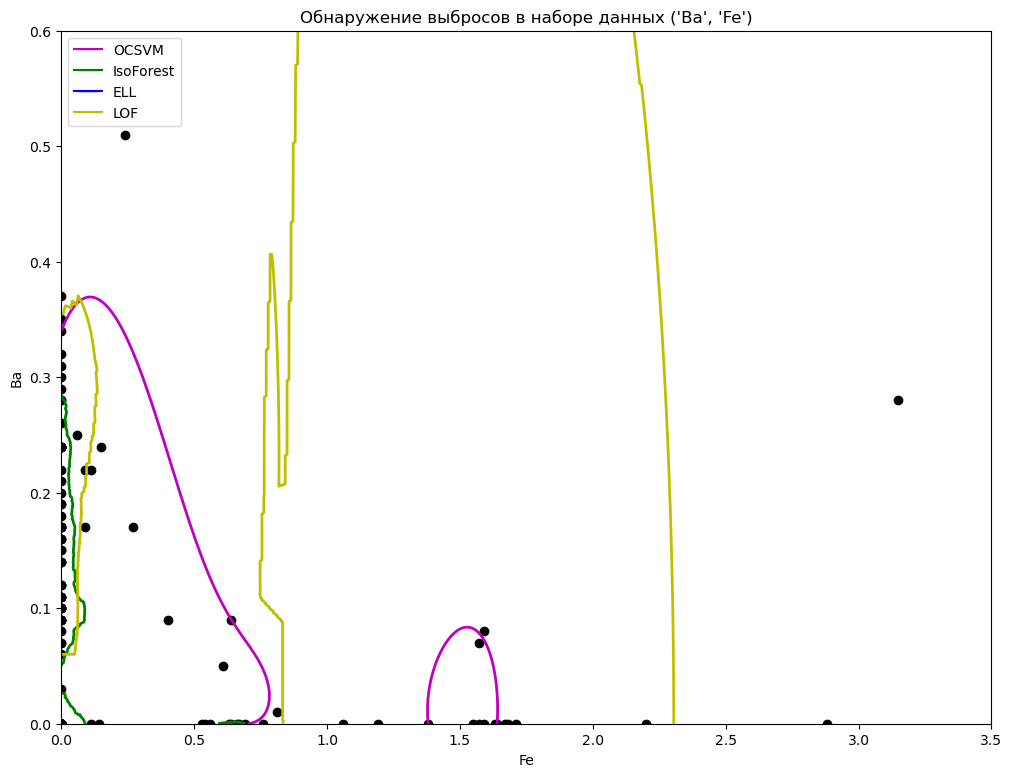

In [143]:
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause
classifiers = {
    "OCSVM": OneClassSVM(nu=0.1), # nu - % выбросов
    "IsoForest": IsolationForest(),
    "ELL": EllipticEnvelope(contamination=0.2),
    "LOF": LocalOutlierFactor(novelty=True)
}
colors = ['m', 'g', 'b', 'y']
legend1 = {}
legend2 = {}


# Выделяем границы обнаружения выбросов с помощью нескольких классификаторов
# метод meshgrid используется для красивой отрисовки
xx1, yy1 = np.meshgrid(np.linspace(0, 3.5, 500), np.linspace(0, 0.6, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1, figsize=(12,9))
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Отрисовка результатов (= форма облака точек данных)
plt.figure(1, figsize=(12,9))  # 2 кластера
plt.title("Обнаружение выбросов в наборе данных ('Ba', 'Fe')")
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], color='black')

plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))

purp_line = mlines.Line2D([], [], color='m', marker='_',
                          markersize=15, label='OCSVM')
green_line = mlines.Line2D([], [], color='g', marker='_',
                          markersize=15, label='IsoForest')
blue_line = mlines.Line2D([], [], color='b', marker='_',
                          markersize=15, label='ELL')
yellow_line = mlines.Line2D([], [], color='y', marker='_',
                          markersize=15, label='LOF')

plt.legend(loc="upper left", handles = [purp_line, green_line, blue_line, yellow_line])

plt.ylabel("Ba")
plt.xlabel("Fe")
plt.show()

###### c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

In [185]:
len_data = len(data.index)
len_data

214

In [186]:
lower_bound = data.RI.quantile(q=0.025)
upper_bound = data.RI.quantile(q=0.975)
abnormal = data[(data.RI < lower_bound) | (data.RI > upper_bound)]
print(abnormal.index)
data1 = data.drop(index=abnormal.index)
data1

Index([47, 56, 103, 106, 107, 111, 112, 171, 172, 180, 184, 185], dtype='int64')


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [187]:
print(round(len(abnormal.index)/len_data*100, 2),'%')

5.61 %


In [188]:
lower_bound = data.Na.quantile(q=0.025)
upper_bound = data.Na.quantile(q=0.975)
abnormal = data[(data.Na < lower_bound) | (data.Na > upper_bound)]
print(abnormal.index)
data = data.drop(index=abnormal.index)
data

Index([105, 106, 110, 111, 165, 166, 181, 184, 189, 199, 200], dtype='int64')


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [189]:
print(round(len(abnormal.index)/len_data*100, 2),'%')

5.14 %


In [190]:
lower_bound = data.Mg.quantile(q=0.025)
upper_bound = data.Mg.quantile(q=0.975)
abnormal = data[(data.Mg < lower_bound) | (data.Mg > upper_bound)]
print(abnormal.index)
data = data.drop(index=abnormal.index)
data

Index([0, 114, 132, 133], dtype='int64')


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [191]:
print(round(len(abnormal.index)/len_data*100, 2),'%')

1.87 %


In [193]:
lower_bound = data.Al.quantile(q=0.025)
upper_bound = data.Al.quantile(q=0.975)
abnormal = data[(data.Al < lower_bound) | (data.Al > upper_bound)]
print(abnormal.index)
data = data.drop(index=abnormal.index)
data

Index([21, 38, 39, 50, 163, 171, 172, 192, 209], dtype='int64')


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [196]:
print(round(len(abnormal.index)/len_data*100, 2),'%')

4.21 %


In [197]:
lower_bound = data.Si.quantile(q=0.025)
upper_bound = data.Si.quantile(q=0.975)
abnormal = data[(data.Si < lower_bound) | (data.Si > upper_bound)]
print(abnormal.index)
data = data.drop(index=abnormal.index)
data

Index([102, 103, 104, 107, 109, 131, 168, 180, 188, 201], dtype='int64')


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [198]:
print(round(len(abnormal.index)/len_data*100, 2),'%')

4.67 %


In [199]:
lower_bound = data.K.quantile(q=0.025)
upper_bound = data.K.quantile(q=0.975)
abnormal = data[(data.K < lower_bound) | (data.K > upper_bound)]
print(abnormal.index)
data = data.drop(index=abnormal.index)
data

Index([84, 174, 185, 186, 207], dtype='int64')


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [200]:
print(round(len(abnormal.index)/len_data*100, 2),'%')

2.34 %


In [201]:
lower_bound = data.Ca.quantile(q=0.025)
upper_bound = data.Ca.quantile(q=0.975)
abnormal = data[(data.Ca < lower_bound) | (data.Ca > upper_bound)]
print(abnormal.index)
data = data.drop(index=abnormal.index)
data

Index([1, 2, 70, 72, 81, 108, 112, 167, 170, 173], dtype='int64')


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [202]:
print(round(len(abnormal.index)/len_data*100, 2),'%')

4.67 %


In [203]:
lower_bound = data.Ba.quantile(q=0.025)
upper_bound = data.Ba.quantile(q=0.975)
abnormal = data[(data.Ba < lower_bound) | (data.Ba > upper_bound)]
print(abnormal.index)
data = data.drop(index=abnormal.index)
data

Index([193, 203, 210, 211, 213], dtype='int64')


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
204,1.51617,14.95,0.00,2.27,73.30,0.00,8.71,0.67,0.00,7
205,1.51732,14.95,0.00,1.80,72.99,0.00,8.61,1.55,0.00,7
206,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00,7
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7


In [204]:
print(round(len(abnormal.index)/len_data*100, 2),'%')

2.34 %


In [205]:
lower_bound = data.Fe.quantile(q=0.025)
upper_bound = data.Fe.quantile(q=0.975)
abnormal = data[(data.Fe < lower_bound) | (data.Fe > upper_bound)]
print(abnormal.index)
data = data.drop(index=abnormal.index)
data

Index([56, 71, 145, 162], dtype='int64')


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
204,1.51617,14.95,0.00,2.27,73.30,0.00,8.71,0.67,0.00,7
205,1.51732,14.95,0.00,1.80,72.99,0.00,8.61,1.55,0.00,7
206,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00,7
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7


In [206]:
print(round(len(abnormal.index)/len_data*100, 2),'%')

1.87 %


In [210]:
print('От исходного датасета осталось', round(len(data.index)/len_data*100, 2),'% данных')

От исходного датасета осталось 72.9 % данных


### 7. Повторите п. 4, п. 5.

In [212]:
x = data[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y = data[['Type']]

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [214]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators=50, random_state=10) #n_estomators - кол-во моделей
#использует ансамдль деревьев
clf_forest.fit(x, y)

RandomForestClassifier(n_estimators=50, random_state=10)

In [215]:
predictions_forest = clf_forest.predict(X_test)

In [216]:
from sklearn.metrics import classification_report
print(f'Для случайного леса: \n\n{classification_report(y_test, predictions_forest)}')

Для случайного леса: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         2

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



### 8. Сформулируйте выводы по проделанной работе.
###### а) Кратко опишите, какие преобразования были сделаны с данными.
Данные были исследованы на выбросы двумя способами: статистическим и с помощью метода кластеризации. Далее выбросы были удалены из данных. Удаление выбросов сократило размер выборки на 27.1%.

###### b) Сравните точность двух моделей.
Точность обеих моделей 100%.

###### c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.
Я считаю, что нужно иметь представление о данных, чтобы иметь возможность самостоятельно оценить реалистичность выбросов. Исследование на выбросы позволяет обнаружить неверные значения. Также выбросы могут содержать ценную информацию, которая теряется при бездумном удалении строк.

Удалять реалистичные выбросы следует в том случае, если это оказывает негативное влияние на качество модели.

Плюсы: 
- позволяет улучшить качество модели
- даёт возможность отследить нетипичные значения

Минусы: 
- бездумное удаление выбросов приводит к потере возможно ценной информации